In [1]:
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import numpy as np
import pandas as pd
from sklearn.metrics import r2_score
from scipy.optimize import curve_fit

In [2]:
data_path = []
data_path.append('data\\initialFF__0.782.txt')
data_path.append('data\\initialFF__0.838.txt')
data_path.append('data\\initialFF__0.894.txt')
data_path.append('data\\initialFF__0.950.txt')

FF_initial = [0.782, 0.838, 0.894, 0.950]
titles = []
for i in range(4):
    titles.append('$FF_{{initial}}= {}$'.format(FF_initial[i]))
print(titles)

numberFigures = 4

def gaussian(x, A, mu, sig): #A: Flaeche der Gaussfunktion
    return A*np.exp(-(x-mu)**2/2/sig**2)

['$FF_{initial}= 0.782$', '$FF_{initial}= 0.838$', '$FF_{initial}= 0.894$', '$FF_{initial}= 0.95$']


In [7]:
data_values = []
x_values = []
popt_values = []
pcov_values = []
for i in range(numberFigures):
    data = pd.read_csv(data_path[i], sep=",", header=None)
    data.columns = ['x(m)', 'Y']
    data = data.drop([0])  # Drop the first row which contains the old header

    # Convert the columns to numeric
    data['x(m)'] = pd.to_numeric(data['x(m)'])
    data['Y'] = pd.to_numeric(data['Y'])
    data_values.append(data['Y'])
    x_values.append(data['x(m)'])

    popt, pcov=curve_fit(gaussian,data['x(m)'],data['Y'], p0= [1/210000, 20E-6, 15e-6])
    popt_values.append(popt)
    pcov_values.append(pcov)
    
x=np.linspace(-10E-6,50E-6, 100)
y_ticks = np.linspace(0, 0.14, 8)
print(y_ticks)
print(range(4))


[0.   0.02 0.04 0.06 0.08 0.1  0.12 0.14]
range(0, 4)


<>:31: SyntaxWarning: invalid escape sequence '\m'
<>:62: SyntaxWarning: invalid escape sequence '\m'
<>:31: SyntaxWarning: invalid escape sequence '\m'
<>:62: SyntaxWarning: invalid escape sequence '\m'
C:\Users\Tobias\AppData\Local\Temp\ipykernel_15484\1713467765.py:31: SyntaxWarning: invalid escape sequence '\m'
  axs[1].set_xlabel('x-position in $\mu m$', fontsize = labelsize)
C:\Users\Tobias\AppData\Local\Temp\ipykernel_15484\1713467765.py:62: SyntaxWarning: invalid escape sequence '\m'
  axs[i].set_xlabel('x-position in $\mu m$', fontsize = labelsize)
C:\Users\Tobias\AppData\Local\Temp\ipykernel_15484\1713467765.py:67: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[i].set_yticklabels(y_ticks)
C:\Users\Tobias\AppData\Local\Temp\ipykernel_15484\1713467765.py:35: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[1]

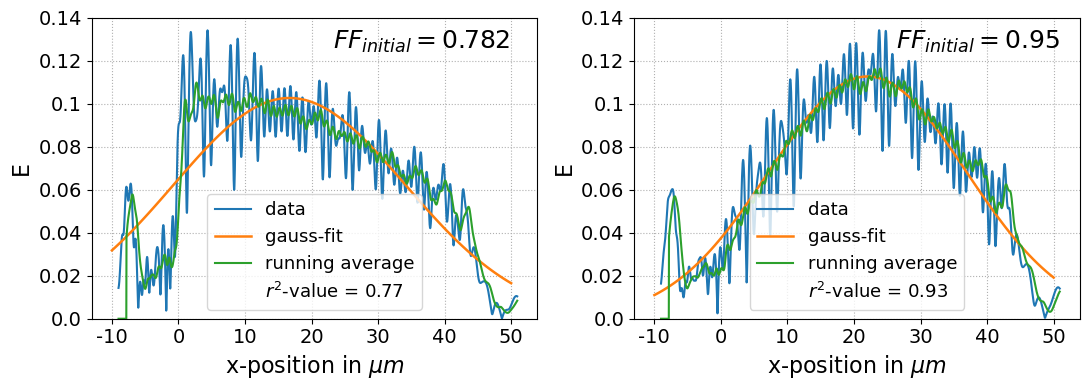

In [24]:
fig, axs = plt.subplots(1, 2, figsize=(11, 4))  # Adjust the figsize to fit your needs
axs = axs.flatten()

window_size = 40
tickslabelsize = 14
labelsize = 16
fontsize = 18
legend = 1

x_label = [False, False, True, True]
y_label = [True, False, True, False]

run_av = []
r2_run = []
for i in [0,3]:
    if i == 3:
        axs[1].plot(x_values[i], data_values[i], marker='', linestyle='-', label = 'data')
        axs[1].plot(x, gaussian(x,*popt_values[i]), label='gauss-fit', linewidth = 1.8)
        running_av = data_values[i].rolling(window=window_size).mean()
        running_av[:40] = gaussian(data_values[i],*popt_values[i])[:40]
        axs[1].plot(x_values[i], running_av, label = 'running average')
        r2_running = np.round(r2_score(running_av, gaussian(x_values[i],*popt_values[i])), 2)
        run_av.append(running_av)
        r2_run.append(r2_running)
        constant_handle = mlines.Line2D([], [], color='none', marker='None', label ='$r^2$-value = {}'.format(r2_running))


        axs[1].ticklabel_format(style='plain', axis='x', useOffset = False)
        axs[1].set_xticks([x * 1e-5 for x in [-1, 0, 1, 2, 3, 4, 5]])
        axs[1].set_xticklabels([-10, 0, 10, 20, 30, 40, 50])
        axs[1].set_xlabel('x-position in $\mu m$', fontsize = labelsize)
        axs[1].set_ylim(0, 0.14)

        axs[1].set_ylabel('E', fontsize = labelsize)
        axs[1].set_yticklabels(y_ticks)

        axs[1].tick_params(axis = 'both', labelsize = tickslabelsize)

        title = axs[1].set_title(titles[i], fontsize = fontsize, y = 0.6)
        title.set_position([0.77, 0.87])

        handles, labels = axs[1].get_legend_handles_labels()
        handles.append(constant_handle)  # Add custom legend entry to handles
        axs[1].legend(handles=handles, fontsize = tickslabelsize - legend)
        axs[1].grid(True, linestyle = ':')
    else:
        axs[i].plot(x_values[i], data_values[i], marker='', linestyle='-', label = 'data')
        axs[i].plot(x, gaussian(x,*popt_values[i]), label='gauss-fit', linewidth = 1.8)
        running_av = data_values[i].rolling(window=window_size).mean()
        running_av[:40] = gaussian(data_values[i],*popt_values[i])[:40]
        axs[i].plot(x_values[i], running_av, label = 'running average')
        r2_running = np.round(r2_score(running_av, gaussian(x_values[i],*popt_values[i])), 2)
        run_av.append(running_av)
        r2_run.append(r2_running)
        constant_handle = mlines.Line2D([], [], color='none', marker='None', label ='$r^2$-value = {}'.format(r2_running))


        axs[i].ticklabel_format(style='plain', axis='x', useOffset = False)
        axs[i].set_xticks([x * 1e-5 for x in [-1, 0, 1, 2, 3, 4, 5]])

        axs[i].set_xticklabels([-10, 0, 10, 20, 30, 40, 50])
        axs[i].set_xlabel('x-position in $\mu m$', fontsize = labelsize)

        axs[i].set_ylim(0, 0.14)
        if (y_label[i]):
            axs[i].set_ylabel('E', fontsize = labelsize)
            axs[i].set_yticklabels(y_ticks)
        else:
            axs[i].set_yticklabels([])

        axs[i].tick_params(axis = 'both', labelsize = tickslabelsize)

        title = axs[i].set_title(titles[i], fontsize = fontsize, y = 0.6)
        title.set_position([0.74, 0.87])

        handles, labels = axs[i].get_legend_handles_labels()
        handles.append(constant_handle)  # Add custom legend entry to handles
        axs[i].legend(handles=handles, fontsize = tickslabelsize - legend)
        axs[i].grid(True, linestyle = ':')

plt.tight_layout()
plt.show()
fig.savefig('gauss_2plots.png', dpi=300)
fig.savefig('gauss_2plots.pdf', dpi=300)